In [2]:
import os
from dotenv import load_dotenv
load_dotenv()

from langchain_community.document_loaders import WebBaseLoader
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_huggingface import HuggingFaceEmbeddings
from langchain_community.vectorstores import FAISS

lc_urls=['https://docs.langchain.com/oss/python/langchain/agents',
'https://docs.langchain.com/oss/python/langchain/tools',
'https://docs.langchain.com/oss/python/langchain/streaming']

lc_docs = WebBaseLoader(web_paths=lc_urls).load()
lc_chunks = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=100).split_documents(lc_docs)
print(f"Number of langchain chunks: {len(lc_chunks)}")
vectorstore = FAISS.from_documents(
    documents=lc_chunks,
    embedding=HuggingFaceEmbeddings(model="sentence-transformers/all-MiniLM-L6-v2")
)

lc_retriever = vectorstore.as_retriever()

Number of langchain chunks: 87


In [ ]:
from langchain.tools import tool

@tool
def langchain_tool(query:str):
    "this function retrieves relevant documents about langchain based on query"
    related_lc_docs =lc_retriever.invoke(query)
    return related_lc_docs

tools = [langchain_tool]
langchain_tool("what is create_agent function used for?")

[Document(id='cfc0e1ae-8858-4cf5-9baf-b7fb74edf53e', metadata={'source': 'https://docs.langchain.com/oss/python/langchain/agents', 'title': 'Agents - Docs by LangChain', 'language': 'en'}, page_content='create_agent provides a production-ready agent implementation.\nAn LLM Agent runs tools in a loop to achieve a goal.\nAn agent runs until a stop condition is met - i.e., when the model emits a final output or an iteration limit is reached.'),
 Document(id='90b5f040-77ef-4e53-a246-50643ea48c25', metadata={'source': 'https://docs.langchain.com/oss/python/langchain/agents', 'title': 'Agents - Docs by LangChain', 'language': 'en'}, page_content='create_agent builds a graph-based agent runtime using LangGraph. A graph consists of nodes (steps) and edges (connections) that define how your agent processes information. The agent moves through this graph, executing nodes like the model node (which calls the model), the tools node (which executes tools), or middleware.Learn more about the Graph A

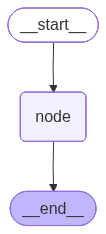

In [ ]:
from typing_extensions import TypedDict
from typing import List, Annotated

from langchain_core.messages import HumanMessage

from langgraph.graph.message import add_messages
from langgraph.graph import StateGraph, START, END

from langchain_groq import ChatGroq
from langchain.agents import create_agent
model = ChatGroq(model="llama-3.1-8b-instant")


class State(TypedDict):
     messages: Annotated[List, add_messages]


# def node(state:State):
#     tools_model = create_agent(model=model, tools=tools, response_format=State)
#     res = tools_model.invoke({"messages":[{"role":"user", "content": state['messages']}]})
#     return {"messages": res}  
# 

agent=create_agent(model=model, tools=tools, debug=True) 
def node(state:State):
     res=agent.invoke({"messages":state['messages']})
     return {"messages": res['messages'][-1].content}

gr = StateGraph(State)

gr.add_node("node", node)
gr.add_edge(START, "node")

gb = gr.compile()
gb



In [ ]:
gb.invoke({"messages":"streaming in langchain"})

[values] {'messages': [HumanMessage(content='streaming in langchain', additional_kwargs={}, response_metadata={}, id='121e39be-6d2d-46bd-ba53-6bda05a60db0')]}
[updates] {'model': {'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'qs5xrme79', 'function': {'arguments': '{"query":"langchain streaming"}', 'name': 'langchain_tool'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 18, 'prompt_tokens': 229, 'total_tokens': 247, 'completion_time': 0.020119333, 'completion_tokens_details': None, 'prompt_time': 0.014904553, 'prompt_tokens_details': None, 'queue_time': 0.049959527, 'total_time': 0.035023886}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_ff2b098aaf', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019b4db8-5a4d-7a32-962f-1149e899c50c-0', tool_calls=[{'name': 'langchain_tool', 'args': {'query': 'langchain streaming'}, 'id': 'qs5xrme79', '

{'messages': [HumanMessage(content='streaming in langchain', additional_kwargs={}, response_metadata={}, id='121e39be-6d2d-46bd-ba53-6bda05a60db0'),
  HumanMessage(content="The langchain_tool function retrieved the following information about streaming in langchain:\n\n1. LangChain's streaming system allows for live feedback from agent runs to be displayed in applications, improving user experience.\n2. Streaming is crucial for enhancing responsiveness in applications built on LLMs.\n3. LangChain implements a streaming system to surface real-time updates.\n4. There are different stream modes available, including agent progress and LLM tokens.\n5. Custom updates can be streamed by using the `streaming` parameter in the `ChatOpenAI` model.\n6. Some chat model integrations support the `streaming` parameter, while others require using `disable_streaming=True`.\n7. LangGraph streaming offers advanced options, including values, debug modes, and subgraph streaming.\n\nThis information provide

AttributeError: 'function' object has no attribute 'invoke'

In [ ]:
gb.invoke({"messages":"hi how are you"})

[values] {'messages': [HumanMessage(content='hi how are you', additional_kwargs={}, response_metadata={}, id='bb805a05-1918-45d9-81bf-b0ec4375c5cc')]}
[updates] {'model': {'messages': [AIMessage(content="I'm functioning properly, thanks for asking. How can I assist you today?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 228, 'total_tokens': 245, 'completion_time': 0.03707645, 'completion_tokens_details': None, 'prompt_time': 0.019042261, 'prompt_tokens_details': None, 'queue_time': 0.050307079, 'total_time': 0.056118711}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_f757f4b0bf', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019b4db8-25f3-77e2-a909-19b8e6b86e2e-0', usage_metadata={'input_tokens': 228, 'output_tokens': 17, 'total_tokens': 245})]}}
[values] {'messages': [HumanMessage(content='hi how are you', additional_kwargs={}, response_metadata={}

{'messages': [HumanMessage(content='hi how are you', additional_kwargs={}, response_metadata={}, id='bb805a05-1918-45d9-81bf-b0ec4375c5cc'),
  HumanMessage(content="I'm functioning properly, thanks for asking. How can I assist you today?", additional_kwargs={}, response_metadata={}, id='b0917942-f00f-4181-8f8b-42f122a559e6')]}